# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load datasets

In [2]:
xl = pd.ExcelFile('online_retail.xlsx')
xl.sheet_names

['Year 2009-2010', 'Year 2010-2011']

In [2]:
data = pd.DataFrame([])
sheets = ['Year 2009-2010', 'Year 2010-2011']
# xl = pd.ExcelFile('online_retail.xlsx')
# sheets = xl.sheet_names

for s in sheets:
    data = pd.concat([data,pd.read_excel('online_retail.xlsx',sheet_name=s)],ignore_index=True)
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
# How many customers are there in the dataset?
data['Customer ID'].nunique()

5942

In [5]:
# Describe the dataset with the necessary information?
data.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [6]:
data[data['Quantity']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [7]:
data[data['Quantity']<0].nunique()

Invoice        11684
StockCode       4089
Description     3300
Quantity         493
InvoiceDate    10709
Price           1006
Customer ID     2572
Country           36
dtype: int64

In [8]:
data[data['Price']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [9]:
data[['Description','Country']].describe()

,Description,Country
count,1062989,1067371
unique,5698,43
top,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,5918,981330


In [10]:
# Is there any abnormal type for each feature?
# How many missing values are there in each feature?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [11]:
data.isna().sum()/len(data)

Invoice        0.000000
StockCode      0.000000
Description    0.004105
Quantity       0.000000
InvoiceDate    0.000000
Price          0.000000
Customer ID    0.227669
Country        0.000000
dtype: float64

**Problem 1**: wrong data type (CustomerID) \
**Problem 2**: missing data (CustomerID, Description)

In [12]:
# How many unique values are there in each feature?
data.nunique()

Invoice        53628
StockCode       5305
Description     5698
Quantity        1057
InvoiceDate    47635
Price           2807
Customer ID     5942
Country           43
dtype: int64

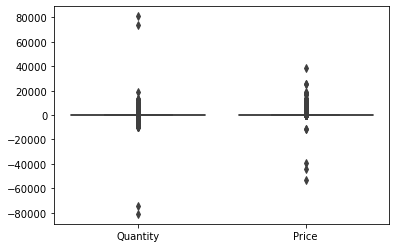

In [13]:
# Are there any outliers in each feature?
sns.boxplot(data=data[['Quantity','Price']])

**Problem 3**: Outlier (Quantity, Price)

In [14]:
data.duplicated().sum()

34335

**Problem 3**: Duplicated

In [15]:
data[data['StockCode'].isin(['TEST','M'])]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2697,489609,M,Manual,1,2009-12-01 14:50:00,4.00,NaN,United Kingdom
3053,C489651,M,Manual,-1,2009-12-01 16:48:00,5.10,17804.0,United Kingdom
5897,C489859,M,Manual,-1,2009-12-02 14:45:00,69.57,NaN,United Kingdom
9259,C490126,M,Manual,-1,2009-12-03 18:12:00,5.95,15884.0,United Kingdom
9307,C490129,M,Manual,-1,2009-12-03 18:26:00,1998.49,15482.0,United Kingdom
...,...,...,...,...,...,...,...,...
1056893,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841.0,United Kingdom
1058543,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971.0,United Kingdom
1059769,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490.0,United Kingdom
1063782,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521.0,United Kingdom


# 3. Data cleaning and preprocessing

In [16]:
# Remove the outliers if any.

In [17]:
# Find Q1, 3
q1 = data['Quantity'].quantile(0.25) #percentile()
q3 = data['Quantity'].quantile(0.75)
# Calculate IQR
IQR = q3 - q1
# Define max min limit
max_limit = q3 + 1.5*IQR
min_limit = q1 - 1.5*IQR

In [18]:
data['Quantity_RO'] = pd.DataFrame(np.where(data['Quantity'] > max_limit, max_limit,
                                   (np.where(data['Quantity'] < min_limit, min_limit, 
                                             data['Quantity']))))
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Quantity_RO
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,23.5
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,23.5


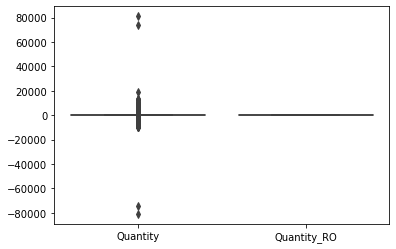

In [19]:
sns.boxplot(data=data[['Quantity','Quantity_RO']])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


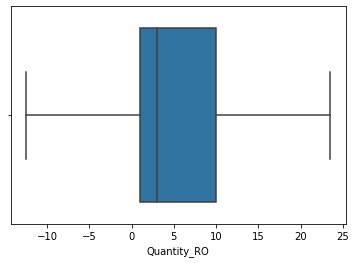

In [20]:
sns.boxplot(data['Quantity_RO'])

In [21]:
# Find Q1, 3
q1 = data['Price'].quantile(0.25) #percentile()
q3 = data['Price'].quantile(0.75)
# Calculate IQR
IQR = q3 - q1
# Define max min limit
max_limit = q3 + 1.5*IQR
min_limit = q1 - 1.5*IQR

In [22]:
data['Price_RO'] = pd.DataFrame(np.where(data['Price'] > max_limit, max_limit,
                                   (np.where(data['Price'] < min_limit, min_limit, 
                                             data['Price']))))
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Quantity_RO,Price_RO
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12.0,6.95
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0,6.75
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0,6.75
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,23.5,2.10
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,23.5,1.25


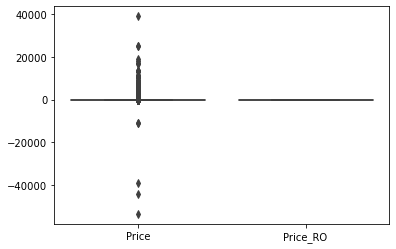

In [23]:
sns.boxplot(data=data[['Price','Price_RO']])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


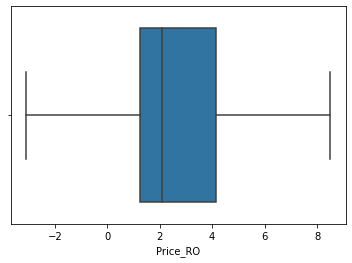

In [24]:
sns.boxplot(data['Price_RO'])

In [25]:
# Remove the missing values if any
data2 = data.dropna(subset=['Customer ID'])
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  float64       
 7   Country      824364 non-null  object        
 8   Quantity_RO  824364 non-null  float64       
 9   Price_RO     824364 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 69.2+ MB


In [26]:
# Convert the date to datetime format
# Convert the quantity to numeric
data2['Quantity_RO'] = data2['Quantity_RO'].astype('int64')

<ipython-input-26-6302e4c8ab93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Quantity_RO'] = data2['Quantity_RO'].astype('int64')


In [27]:
data2['Customer ID'] = data2['Customer ID'].astype('int64')

<ipython-input-27-1832e03338a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Customer ID'] = data2['Customer ID'].astype('int64')


In [28]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  int64         
 7   Country      824364 non-null  object        
 8   Quantity_RO  824364 non-null  int64         
 9   Price_RO     824364 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 69.2+ MB


In [29]:
data2 = data2.drop_duplicates()
data2 = data2[~data2['StockCode'].isin(['TEST','M'])]
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796800 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      796800 non-null  object        
 1   StockCode    796800 non-null  object        
 2   Description  796800 non-null  object        
 3   Quantity     796800 non-null  int64         
 4   InvoiceDate  796800 non-null  datetime64[ns]
 5   Price        796800 non-null  float64       
 6   Customer ID  796800 non-null  int64         
 7   Country      796800 non-null  object        
 8   Quantity_RO  796800 non-null  int64         
 9   Price_RO     796800 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 66.9+ MB


In [30]:
data2[data2['StockCode'].isin(['TEST','M'])]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Quantity_RO,Price_RO


# 4. Data visualization and analysis

In [4]:
data['InvoiceDate'].dt.year

0          2009
1          2009
2          2009
3          2009
4          2009
           ... 
1067366    2011
1067367    2011
1067368    2011
1067369    2011
1067370    2011
Name: InvoiceDate, Length: 1067371, dtype: int64

In [5]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [11]:
df = data.groupby('Country')['Invoice'].nunique().reset_index()
df.head()

,Country,Invoice
0,Australia,117
1,Austria,51
2,Bahrain,12
3,Belgium,183
4,Bermuda,1


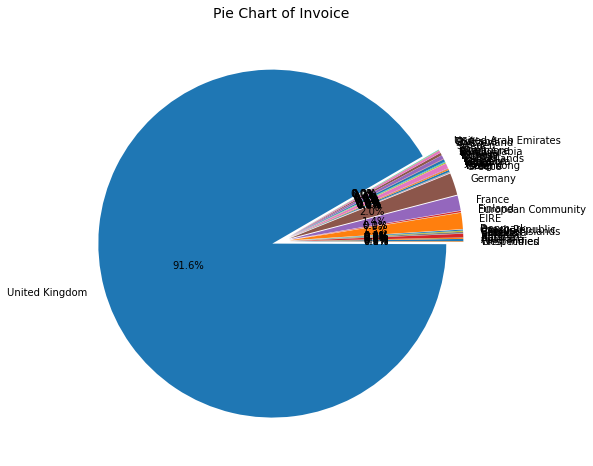

In [33]:
def pie(data,label,col,title=None,figsize = (32,30),fontsize=14):
    plt.figure(figsize = figsize)
    labels = data[label]
    plt.pie(x=data[col], autopct='%.1f%%', explode=[0.05]*data[label].count(), labels=labels, pctdistance=0.5)
    plt.title(title, fontsize=fontsize)
pie(data=df,label='Country',col='Invoice',title='Pie Chart of Invoice',figsize = (12,8),fontsize=14)

# 5. Feature creation

In [31]:
data2['StockValue'] = data2['Quantity'] * data2['Price']

In [32]:
last_InvoiceDate = data2.groupby('Customer ID',as_index=False)['InvoiceDate'].max()
last_InvoiceDate.rename(columns={'InvoiceDate':'last_InvoiceDate'},inplace=True)
last_InvoiceDate.head()

,Customer ID,last_InvoiceDate
0,12346,2011-01-18 10:17:00
1,12347,2011-12-07 15:52:00
2,12348,2011-09-25 13:13:00
3,12349,2011-11-21 09:51:00
4,12350,2011-02-02 16:01:00


In [34]:
data2 = data2.merge(last_InvoiceDate,on='Customer ID')
data2['Recency'] = ((data2['last_InvoiceDate']-data2['InvoiceDate'])/np.timedelta64(1, 'M')).astype('int64')
data2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Quantity_RO,Price_RO,StockValue,last_InvoiceDate,Recency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,12,6.95,83.4,2011-07-05 12:11:00,19
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,12,6.75,81.0,2011-07-05 12:11:00,19
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,12,6.75,81.0,2011-07-05 12:11:00,19
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,23,2.10,100.8,2011-07-05 12:11:00,19
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,23,1.25,30.0,2011-07-05 12:11:00,19


In [ ]:
np.sort(data2['Recency'].unique())

In [35]:
df = data2.groupby(['Customer ID','Recency']).agg({'Invoice':'nunique','StockValue':'sum'}).reset_index()
df.rename(columns={'Invoice':'Frequency','StockValue':'Monetary'},inplace=True)
df.head()

,Customer ID,Recency,Frequency,Monetary
0,12346,0,2,0.00
1,12346,3,2,-5.50
2,12346,6,1,142.31
3,12346,10,1,27.05
4,12346,11,2,-81.00


In [ ]:
legend = 'y_kmean'

In [ ]:
group by customer ID -> max (recency), sum(frequency), sum(monetary)
